In [264]:
import pandas as pd

# Load the dataset
file_path = 'C:/Users/hijas/Documents/ASSESSMENTS/Car Sales Prediciton/dubizzle_cars_dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
# print("First few rows of the dataset:")
display(df.head())

# Display the summary of the dataset
# print("\nSummary of the dataset:")
# display(df.info())

# # Display the basic statistics of the dataset
# print("\nBasic statistics of the dataset:")
# display(df.describe())

# # Check for missing values
# print("\nMissing values in each column:")
# display(df.isnull().sum())

# # Display the columns of the dataset
# print("\nColumns in the dataset:")
# print(df.columns)

# # Display the data types of each column
# print("\nData types of each column:")
# print(df['trim'].value_counts())


,price,brand,model,trim,kilometers,year,vehicle_age_years,regional_specs,doors,body_type,...,interior_color,warranty,address,country,city,area_name,location_name,latitude,longitude,seller_type
0,129900,Dodge,Ram,1500 SLT Crew,47566,2021,3,GCC Specs,4,Pick Up Truck,...,Unknown,Yes,"Al Khabaisi, Deira, Dubai, UAE",UAE,Dubai,Deira,Al Khabaisi,25.266173,55.337772,Dealership/Certified Pre-Owned
1,319900,Alfa Romeo,Stelvio,Quadrifoglio,8914,2020,4,GCC Specs,5,SUV,...,Black,Yes,"Abu Hail, Deira, Dubai, UAE",UAE,Dubai,Deira,Abu Hail,25.275416,55.346450,Dealership/Certified Pre-Owned
2,149900,Audi,Q5,S-line,72205,2019,5,GCC Specs,5,SUV,...,Brown,Yes,"Al Khabaisi, Deira, Dubai, UAE",UAE,Dubai,Deira,Al Khabaisi,25.266173,55.337772,Dealership/Certified Pre-Owned
3,79900,Alfa Romeo,GIULIETTA,Veloce,49193,2021,3,GCC Specs,4,Hatchback,...,Black,Yes,"Al Khabaisi, Deira, Dubai, UAE",UAE,Dubai,Deira,Al Khabaisi,25.266173,55.337772,Dealership/Certified Pre-Owned
4,154900,GAC,GS8,GL,30,2024,0,GCC Specs,5,SUV,...,Other Color,Yes,"Al Khabaisi, Deira, Dubai, UAE",UAE,Dubai,Deira,Al Khabaisi,25.266173,55.337772,Dealership/Certified Pre-Owned


In [265]:
# regional_specs,body_type,fuel_type,transmission_type,horsepower,warranty,seller_type,engine_capacity_cc

columns_to_remove = ['address', 'area_name', 'location_name', 'latitude', 'longitude','vehicle_age_years','country']
df_cleaned = df.drop(columns=columns_to_remove)
display(df_cleaned.head())

,price,brand,model,trim,kilometers,year,regional_specs,doors,body_type,fuel_type,seating_capacity,transmission_type,engine_capacity_cc,horsepower,no_of_cylinders,exterior_color,interior_color,warranty,city,seller_type
0,129900,Dodge,Ram,1500 SLT Crew,47566,2021,GCC Specs,4,Pick Up Truck,Petrol,5,Automatic Transmission,4000+ cc,300 - 399 HP,8,White,Unknown,Yes,Dubai,Dealership/Certified Pre-Owned
1,319900,Alfa Romeo,Stelvio,Quadrifoglio,8914,2020,GCC Specs,5,SUV,Petrol,5,Automatic Transmission,2500 - 2999 cc,500 - 599 HP,6,Red,Black,Yes,Dubai,Dealership/Certified Pre-Owned
2,149900,Audi,Q5,S-line,72205,2019,GCC Specs,5,SUV,Petrol,5,Automatic Transmission,2000 - 2499 cc,200 - 299 HP,4,Green,Brown,Yes,Dubai,Dealership/Certified Pre-Owned
3,79900,Alfa Romeo,GIULIETTA,Veloce,49193,2021,GCC Specs,4,Hatchback,Petrol,5,Automatic Transmission,1500 - 1999 cc,200 - 299 HP,4,Grey,Black,Yes,Dubai,Dealership/Certified Pre-Owned
4,154900,GAC,GS8,GL,30,2024,GCC Specs,5,SUV,Petrol,7,Automatic Transmission,2000 - 2499 cc,200 - 299 HP,4,Silver,Other Color,Yes,Dubai,Dealership/Certified Pre-Owned


In [266]:
# Identify string (object) columns
string_columns = df_cleaned.select_dtypes(include=['object']).columns
print("String columns:", string_columns)

String columns: Index(['brand', 'model', 'trim', 'regional_specs', 'body_type', 'fuel_type',
       'transmission_type', 'engine_capacity_cc', 'horsepower',
       'exterior_color', 'interior_color', 'warranty', 'city', 'seller_type'],
      dtype='object')


In [267]:
columns_to_convert = [
    'regional_specs', 'body_type', 'fuel_type', 'transmission_type', 
    'warranty', 'seller_type', 'engine_capacity_cc','no_of_cylinders','seating_capacity','doors','horsepower'
]

# Convert the columns to categorical
df_cleaned[columns_to_convert] = df_cleaned[columns_to_convert].fillna('Unknown')
for column in columns_to_convert:
    df_cleaned[column] = df_cleaned[column].astype('category')

display(df_cleaned.dtypes)    

price                    int64
brand                   object
model                   object
trim                    object
kilometers               int64
year                     int64
regional_specs        category
doors                 category
body_type             category
fuel_type             category
seating_capacity      category
transmission_type     category
engine_capacity_cc    category
horsepower            category
no_of_cylinders       category
exterior_color          object
interior_color          object
warranty              category
city                    object
seller_type           category
dtype: object

In [268]:
for column in columns_to_convert:
    print(f"Categories for {column}:")
    print(df_cleaned[column].cat.categories)

Categories for regional_specs:
Index(['American Specs', 'Canadian Specs', 'Chinese Specs', 'European Specs',
       'GCC Specs', 'Japanese Specs', 'Korean Specs', 'Other'],
      dtype='object')
Categories for body_type:
Index(['Coupe', 'Crossover', 'Hard Top Convertible', 'Hatchback', 'Other',
       'Pick Up Truck', 'SUV', 'Sedan', 'Soft Top Convertible', 'Sports Car',
       'Utility Truck', 'Van', 'Wagon'],
      dtype='object')
Categories for fuel_type:
Index(['Diesel', 'Electric', 'Hybrid', 'Petrol'], dtype='object')
Categories for transmission_type:
Index(['Automatic Transmission', 'Manual Transmission'], dtype='object')
Categories for warranty:
Index(['Does not apply', 'No', 'Yes'], dtype='object')
Categories for seller_type:
Index(['Dealer', 'Dealership/Certified Pre-Owned', 'Owner'], dtype='object')
Categories for engine_capacity_cc:
Index(['0 - 499 cc', '1000 - 1499 cc', '1500 - 1999 cc', '2000 - 2499 cc',
       '2500 - 2999 cc', '3000 - 3499 cc', '3500 - 3999 cc', '4000+ c

In [269]:
# print("\nMissing values in each column:")
# display(df_cleaned.isnull().sum())

In [270]:
df_cleaned = df_cleaned.drop_duplicates()


In [271]:
df_cleaned['brand'] = df_cleaned['brand'].str.strip().str.title()
df_cleaned['model'] = df_cleaned['model'].str.strip().str.title()

In [272]:
brand_model_dict = df_cleaned.groupby('brand')['model'].apply(list).to_dict()

# Remove duplicates from the lists in the dictionary
brand_model_dict_no_duplicates = {brand: list(dict.fromkeys(models)) for brand, models in brand_model_dict.items()}

# Display the dictionary to verify
print("\nBrand-Model Dictionary without duplicates:")
display(brand_model_dict_no_duplicates['Audi'])
import json
with open('brand_model_dict.json', 'w') as f:
    json.dump(brand_model_dict_no_duplicates, f)


Brand-Model Dictionary without duplicates:


['Q5',
 'A3',
 'Q7',
 'S8',
 'S7/Rs7',
 'Q8',
 'S3/Rs3',
 'Rs Q8',
 'A8',
 'S6/Rs6',
 'R8',
 'A4',
 'E-Tron',
 'A6',
 'A7',
 'A1',
 'S5/Rs5',
 'Tt',
 'Q3',
 'A5',
 'S4/Rs4',
 'Q2',
 'Rsq3']

In [273]:
print("\nMissing values in each column:")
display(df_cleaned.isnull().sum())


Missing values in each column:


price                  0
brand                  0
model                  0
trim                  11
kilometers             0
year                   0
regional_specs         0
doors                  0
body_type              0
fuel_type              0
seating_capacity       0
transmission_type      0
engine_capacity_cc     0
horsepower             0
no_of_cylinders        0
exterior_color         0
interior_color         0
warranty               0
city                   0
seller_type            0
dtype: int64

In [274]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# # Scatter plot of Price vs. Mileage
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='kilometers', y='price', data=df_cleaned)
# plt.title('Price vs. Mileage')
# plt.xlabel('Mileage')
# plt.ylabel('Price')
# plt.show()

# # Scatter plot of Price vs. Year
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='year', y='price', data=df_cleaned)
# plt.title('Price vs. Year')
# plt.xlabel('Year')
# plt.ylabel('Price')
# plt.show()


# # Count plot of Car Brands
# plt.figure(figsize=(14, 16))
# sns.countplot(y='brand', data=df_cleaned, order=df_cleaned['brand'].value_counts().index)
# plt.title('Count of Cars by Brand')
# plt.xlabel('Count')
# plt.ylabel('Brand')
# plt.show()

# # Boxplot of Car Prices by Brand
# plt.figure(figsize=(14, 16))
# sns.boxplot(x='price', y='brand', data=df_cleaned)
# plt.title('Boxplot of Car Prices by Brand')
# plt.xlabel('Price')
# plt.ylabel('Brand')
# plt.show()

In [275]:
display(df_cleaned.dtypes)

price                    int64
brand                   object
model                   object
trim                    object
kilometers               int64
year                     int64
regional_specs        category
doors                 category
body_type             category
fuel_type             category
seating_capacity      category
transmission_type     category
engine_capacity_cc    category
horsepower            category
no_of_cylinders       category
exterior_color          object
interior_color          object
warranty              category
city                    object
seller_type           category
dtype: object

In [276]:
df_cleaned.head()

,price,brand,model,trim,kilometers,year,regional_specs,doors,body_type,fuel_type,seating_capacity,transmission_type,engine_capacity_cc,horsepower,no_of_cylinders,exterior_color,interior_color,warranty,city,seller_type
0,129900,Dodge,Ram,1500 SLT Crew,47566,2021,GCC Specs,4,Pick Up Truck,Petrol,5,Automatic Transmission,4000+ cc,300 - 399 HP,8,White,Unknown,Yes,Dubai,Dealership/Certified Pre-Owned
1,319900,Alfa Romeo,Stelvio,Quadrifoglio,8914,2020,GCC Specs,5,SUV,Petrol,5,Automatic Transmission,2500 - 2999 cc,500 - 599 HP,6,Red,Black,Yes,Dubai,Dealership/Certified Pre-Owned
2,149900,Audi,Q5,S-line,72205,2019,GCC Specs,5,SUV,Petrol,5,Automatic Transmission,2000 - 2499 cc,200 - 299 HP,4,Green,Brown,Yes,Dubai,Dealership/Certified Pre-Owned
3,79900,Alfa Romeo,Giulietta,Veloce,49193,2021,GCC Specs,4,Hatchback,Petrol,5,Automatic Transmission,1500 - 1999 cc,200 - 299 HP,4,Grey,Black,Yes,Dubai,Dealership/Certified Pre-Owned
4,154900,Gac,Gs8,GL,30,2024,GCC Specs,5,SUV,Petrol,7,Automatic Transmission,2000 - 2499 cc,200 - 299 HP,4,Silver,Other Color,Yes,Dubai,Dealership/Certified Pre-Owned


In [277]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler

# Ensure the columns are properly categorized
categorical_columns = ['brand', 'model', 'trim', 'regional_specs', 'body_type', 'fuel_type',
                       'transmission_type', 'engine_capacity_cc', 'warranty',
                       'seller_type', 'exterior_color', 'interior_color', 'country', 'city','no_of_cylinders','seating_capacity','doors','horsepower']

numerical_columns = ['kilometers', 'year', 'vehicle_age_years']

label_encoders={}
for col in categorical_columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

scaler_y = MinMaxScaler()
df_cleaned['price'] = scaler_y.fit_transform(df_cleaned['price'].values.reshape(-1, 1)).flatten() 

# Use OneHotEncoder for the rest of the categorical variables
# onehot_columns = [col for col in categorical_columns if col not in label_enc_columns]
# encoder = OneHotEncoder(sparse_output=False, drop='first')
# encoded_features = encoder.fit_transform(df_cleaned[onehot_columns])

# Create a DataFrame with the encoded features
# encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(onehot_columns))

# Ensure indices align before concatenation
# encoded_df.index = df_cleaned.index

# Concatenate the original DataFrame (excluding the original one-hot encoded columns) with the encoded DataFrame
# df_encoded = pd.concat([df_cleaned.drop(columns=onehot_columns), encoded_df], axis=1)


# Use StandardScaler to normalize numerical features
scaler_x = StandardScaler()
df_encoded=df_cleaned
df_encoded[numerical_columns] = scaler_x.fit_transform(df_encoded[numerical_columns])


In [ ]:
display(df_encoded)

,price,brand,model,trim,kilometers,year,vehicle_age_years,regional_specs,doors,body_type,...,transmission_type,engine_capacity_cc,horsepower,no_of_cylinders,exterior_color,interior_color,warranty,country,city,seller_type
0,0.129042,21,468,25,-0.374474,0.554887,-0.554887,4,2,5,...,0,7,3,5,15,7,2,0,3,1
1,0.319251,2,531,544,-0.810244,0.355839,-0.355839,4,3,6,...,0,4,5,4,11,1,2,0,3,1
2,0.149064,4,448,594,-0.096690,0.156790,-0.156790,4,3,6,...,0,3,2,2,6,3,2,0,3,1
3,0.078987,2,256,753,-0.356131,0.554887,-0.554887,4,2,3,...,0,2,2,2,7,1,2,0,3,1
4,0.154069,27,286,340,-0.910404,1.152033,-1.152033,4,3,6,...,0,3,2,2,12,5,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9948,0.214236,51,367,524,1.242628,-0.440356,0.440356,4,2,6,...,0,9,10,5,15,0,0,0,6,0
9949,0.077085,70,122,408,0.949499,-0.838453,0.838453,4,2,6,...,0,5,10,5,15,7,0,0,6,0
9950,0.172189,84,355,415,0.599999,-0.042259,0.042259,4,2,6,...,0,9,10,4,1,0,2,0,6,0
9951,0.062068,84,440,731,2.358772,-1.435599,1.435599,4,3,6,...,0,9,10,4,15,0,0,0,6,0


In [ ]:
df_encoded.shape[0]

7673

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy import stats
# Group by brand and model
grouped = df_encoded.groupby(['brand', 'model','year'])

def remove_outliers(group):
    z_scores = np.abs(stats.zscore(group['price']))
    threshold = 3
    return group[z_scores <= threshold]

# Apply the outlier removal function to each group
df_no_outliers = grouped.apply(remove_outliers).reset_index(drop=True)

# Check the shape of the data before and after removing outliers
print(f"Original dataset shape: {df_cleaned.shape}")
print(f"Dataset shape after removing outliers: {df_no_outliers.shape}")


Original dataset shape: (7673, 22)
Dataset shape after removing outliers: (6202, 22)


C:\Users\hijas\AppData\Local\Temp\ipykernel_28376\2541063385.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_no_outliers = grouped.apply(remove_outliers).reset_index(drop=True)


In [ ]:
df_no_outliers

,price,brand,model,trim,kilometers,year,vehicle_age_years,regional_specs,doors,body_type,...,transmission_type,engine_capacity_cc,horsepower,no_of_cylinders,exterior_color,interior_color,warranty,country,city,seller_type
0,0.108119,0,50,512,-0.865646,0.952984,-0.952984,4,0,3,...,0,9,2,2,1,1,2,0,3,2
1,0.108119,0,50,512,-0.876920,0.952984,-0.952984,4,0,0,...,0,1,1,2,1,1,2,0,3,0
2,0.128141,0,50,512,-0.820549,0.952984,-0.952984,4,1,3,...,0,1,1,2,2,1,2,0,3,0
3,0.084093,2,255,753,0.378957,-0.042259,0.042259,4,2,7,...,0,3,2,2,11,1,1,0,3,0
4,0.085995,2,255,753,-0.067061,-0.042259,0.042259,4,2,7,...,0,3,2,2,11,3,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6197,0.009911,87,613,238,1.118612,-2.032744,2.032744,4,2,6,...,0,4,2,4,7,0,1,0,3,2
6198,0.015918,87,613,678,2.110740,-2.032744,2.032744,4,3,6,...,0,7,3,5,12,0,1,0,3,2
6199,0.159175,87,613,437,-0.239928,0.156790,-0.156790,4,2,6,...,0,3,3,2,7,3,0,0,3,2
6200,0.134148,87,613,541,-0.020081,0.156790,-0.156790,4,2,6,...,0,9,1,2,7,6,2,0,3,0


In [ ]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
import matplotlib.pyplot as plt

In [ ]:
# !pip install scikeras[tensorflow]

In [ ]:

# Split the data into training and testing sets
X = df_no_outliers.drop(columns=['price'])
y = df_no_outliers['price']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = xgb_model.predict(X_test)

# Calculate metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# print(f"\nXGBoost Model Performance:")
# print(f"RMSE: {rmse:.4f}")
# print(f"R²: {r2:.4f}")
# print(f"MAE: {mae:.4f}")
# display(df_no_outliers.isnull().sum())



XGBoost Model Performance:
RMSE: 0.1161
R²: 0.6483
MAE: 0.0553


c:\Users\hijas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Text(0.5, 1.0, 'XGBoost: Actual vs. Predicted')

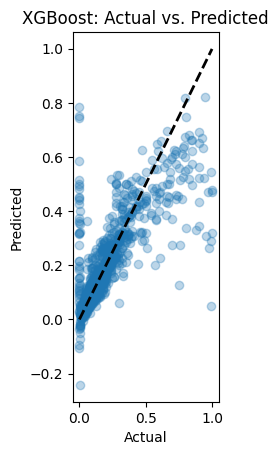

In [ ]:
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGBoost: Actual vs. Predicted')

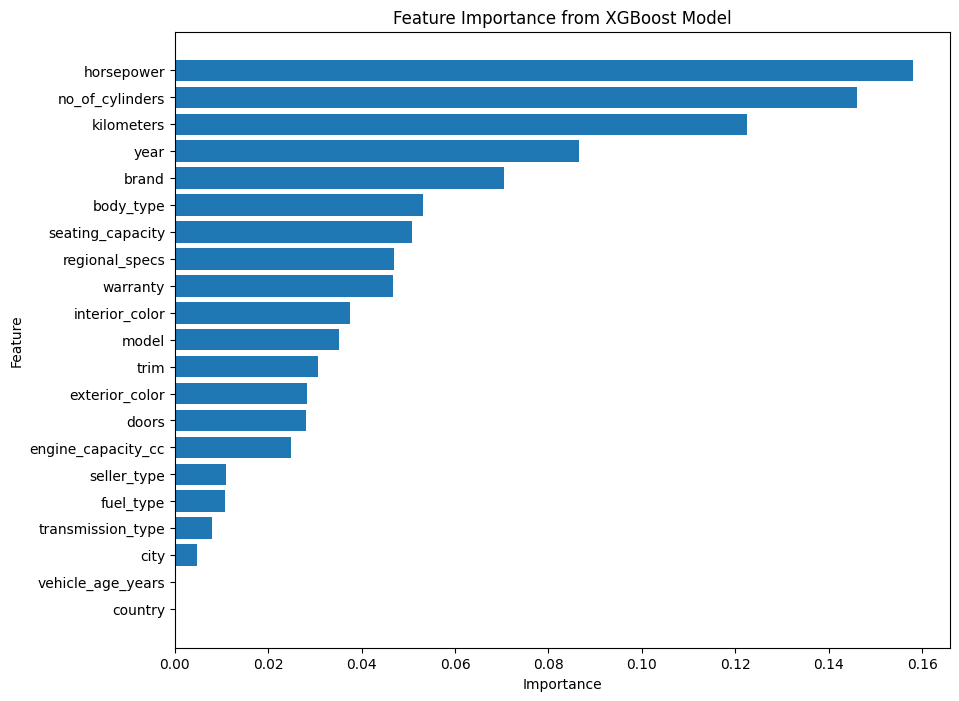

In [ ]:
feature_importance = xgb_model.feature_importances_
features = df_encoded.drop(columns=['price']).columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from XGBoost Model')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
import joblib



In [ ]:
# Serialize the trained model
joblib.dump(xgb_model, 'xgb_model.pkl')

# Serialize the scalers
joblib.dump(scaler_x, 'scaler_X.pkl')
joblib.dump(scaler_y, 'scaler_y.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

['label_encoders.pkl']

In [ ]:
# for col, encoder in label_encoders.items():
#     print(f"Column: {col}")
#     # print(f"Classes: {encoder.classes_}")
#     print()
print(label_encoders.items())

dict_items([('brand', LabelEncoder()), ('model', LabelEncoder()), ('trim', LabelEncoder()), ('regional_specs', LabelEncoder()), ('body_type', LabelEncoder()), ('fuel_type', LabelEncoder()), ('transmission_type', LabelEncoder()), ('engine_capacity_cc', LabelEncoder()), ('warranty', LabelEncoder()), ('seller_type', LabelEncoder()), ('exterior_color', LabelEncoder()), ('interior_color', LabelEncoder()), ('country', LabelEncoder()), ('city', LabelEncoder()), ('no_of_cylinders', LabelEncoder()), ('seating_capacity', LabelEncoder()), ('doors', LabelEncoder()), ('horsepower', LabelEncoder())])
